Dataset can be found at https://www.kaggle.com/cfpb/us-consumer-finance-complaints

In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
df = pd.read_csv("Ecommerce Customers.csv")
df.shape

(500, 8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# We're only going to use numeric data for Kmeans.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
X = df.drop(
    columns=[
        "Email",
        "Address",
        "Avatar",
    ]
)
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## scaling and clustering data 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
clst = KMeans(5)
clst.fit(X_scaled)

KMeans(n_clusters=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
clst_df = X.copy()

clst_df["label"] = clst.labels_
clst_df = clst_df[clst_df["label"] != -1]

clst_df["label"] = "Cluster: " + clst_df["label"].astype(str)
clst_df["label"].value_counts()

Cluster: 4    120
Cluster: 2    110
Cluster: 0    107
Cluster: 1     85
Cluster: 3     78
Name: label, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
clst_avgs = clst_df.groupby("label").mean()
clst_avgs = clst_avgs.sort_values("Yearly Amount Spent")
clst_avgs.style.background_gradient()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
label,,,,,
Cluster: 0,32.741032,11.253976,37.123021,2.495919,394.935792
Cluster: 4,32.417048,12.679630,36.760179,3.218610,487.559062
Cluster: 2,33.492173,11.300223,36.508239,4.068334,514.761518
Cluster: 1,33.242062,12.246454,38.355232,3.659302,519.856044
Cluster: 3,33.635208,13.032561,36.804320,4.549702,616.413733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

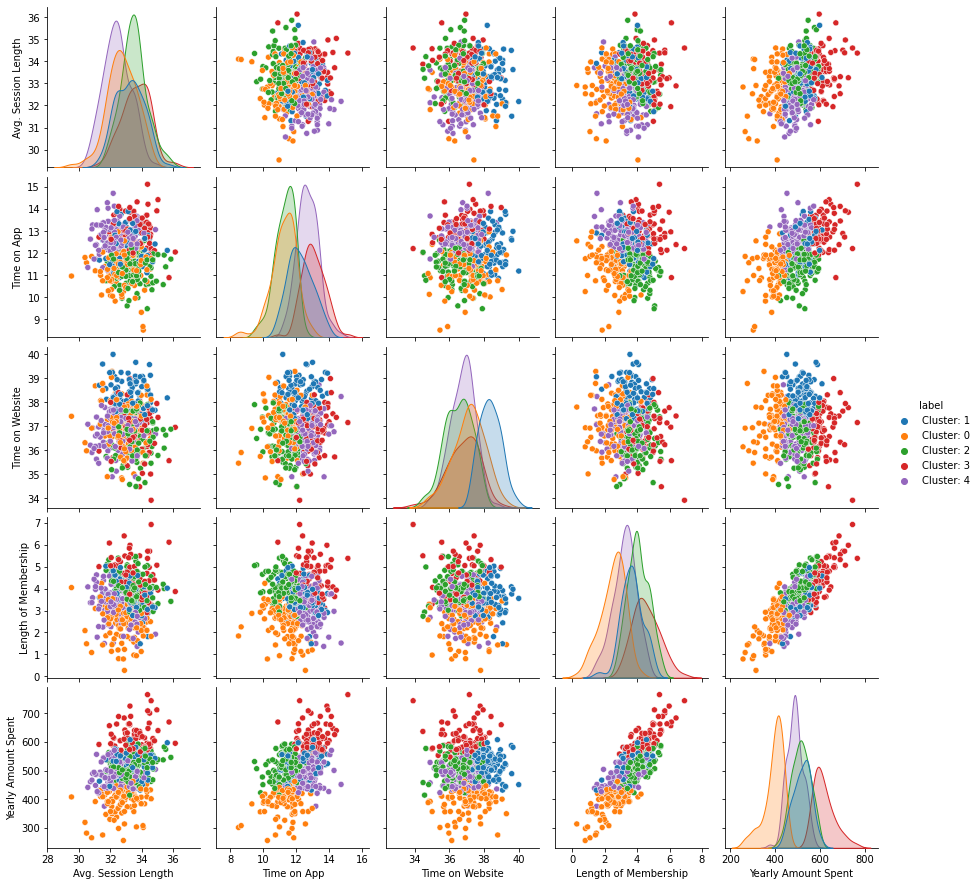

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
sns.pairplot(clst_df, hue="label")
plt.show()

In [ ]:
# Need to try other clustering algos and go back to describe cluster groups and looks for insights. 